# **BACS2003 Artificial Intelligence**

## Group Members


| Name | Student ID |
| --- | --- |
| LAU AIK HUNG | 23WMR14555 |
| KESHANDRA A/L JAYASELAN | 23WMR14549 |
| LEONG CHUN XIANG | 23WMR15624 |


## Dataset

In [32]:
!pip install datasets


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
import pandas as pd

from IPython.display import display

# Load the Amazon products dataset
df = pd.read_csv('music_users.csv') 

# Display as a clean table 
display(df)

,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,Female,18,K-Pop,15,Yes,Spotify,UK,Free,High,PC,Afternoon,62
1,2,Male,34,Traditional,16,No,Apple Music,USA,Family,High,PC,Afternoon,19
2,3,Male,32,Chill,15,Yes,NetEase Cloud,Japan,Premium,Medium,Mobile,Afternoon,48
3,4,Male,41,Jazz,16,No,Apple Music,UK,Student,Medium,Smart Speaker,Morning,38
4,5,Male,21,Pop,23,Yes,QQ Music,Korea,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Male,45,Oldies,19,No,YouTube Music,France,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,Female,35,Oldies,17,Yes,Apple Music,USA,Free,High,Tablet,Night,26
9997,9998,Female,28,Traditional,5,No,Apple Music,USA,Student,Low,Tablet,Afternoon,26
9998,9999,Female,25,K-Pop,13,No,NetEase Cloud,France,Free,Medium,PC,Afternoon,76


## Data Analysis

### Data Transformation, Data Preparation

In [4]:
# Check the column names
print(df.columns)

# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

Index(['UserID', 'Gender', 'Age', 'FavoriteMusicType', 'WeeklyListeningHours',
       'PaidSubscription', 'ListeningPlatform', 'Country', 'SubscriptionType',
       'GenrePreferenceLevel', 'DeviceType', 'ListeningTimeOfDay',
       'NumberOfPlaylists'],
      dtype='object')


In [5]:
# Check missing values
print(df.isnull().sum())

UserID                  0
Gender                  0
Age                     0
FavoriteMusicType       0
WeeklyListeningHours    0
PaidSubscription        0
ListeningPlatform       0
Country                 0
SubscriptionType        0
GenrePreferenceLevel    0
DeviceType              0
ListeningTimeOfDay      0
NumberOfPlaylists       0
dtype: int64


In [6]:
# check if the datatypes for the data needs to do tranform or not 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   UserID                10000 non-null  int64 
 1   Gender                10000 non-null  object
 2   Age                   10000 non-null  int64 
 3   FavoriteMusicType     10000 non-null  object
 4   WeeklyListeningHours  10000 non-null  int64 
 5   PaidSubscription      10000 non-null  object
 6   ListeningPlatform     10000 non-null  object
 7   Country               10000 non-null  object
 8   SubscriptionType      10000 non-null  object
 9   GenrePreferenceLevel  10000 non-null  object
 10  DeviceType            10000 non-null  object
 11  ListeningTimeOfDay    10000 non-null  object
 12  NumberOfPlaylists     10000 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1015.8+ KB
None


#### Change Gender to 1: Male 2: Female

In [7]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 2})

df

,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,K-Pop,15,Yes,Spotify,UK,Free,High,PC,Afternoon,62
1,2,1,34,Traditional,16,No,Apple Music,USA,Family,High,PC,Afternoon,19
2,3,1,32,Chill,15,Yes,NetEase Cloud,Japan,Premium,Medium,Mobile,Afternoon,48
3,4,1,41,Jazz,16,No,Apple Music,UK,Student,Medium,Smart Speaker,Morning,38
4,5,1,21,Pop,23,Yes,QQ Music,Korea,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,Oldies,19,No,YouTube Music,France,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,Oldies,17,Yes,Apple Music,USA,Free,High,Tablet,Night,26
9997,9998,2,28,Traditional,5,No,Apple Music,USA,Student,Low,Tablet,Afternoon,26
9998,9999,2,25,K-Pop,13,No,NetEase Cloud,France,Free,Medium,PC,Afternoon,76


#### Replace music genres with corresponding numeric values

In [8]:
# Replace music genres with corresponding numeric values
df['FavoriteMusicType'] = df['FavoriteMusicType'].replace({
    'Rock': 1,
    'Pop': 2,
    'J-Pop': 3,
    'K-Pop': 4,
    'EDM': 5,
    'Jazz': 6,
    'Chill': 7,
    'Oldies': 8,
    'Traditional': 9
})

df

C:\Users\Axinzen Lau\AppData\Local\Temp\ipykernel_30376\1985122484.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FavoriteMusicType'] = df['FavoriteMusicType'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,Yes,Spotify,UK,Free,High,PC,Afternoon,62
1,2,1,34,9,16,No,Apple Music,USA,Family,High,PC,Afternoon,19
2,3,1,32,7,15,Yes,NetEase Cloud,Japan,Premium,Medium,Mobile,Afternoon,48
3,4,1,41,6,16,No,Apple Music,UK,Student,Medium,Smart Speaker,Morning,38
4,5,1,21,2,23,Yes,QQ Music,Korea,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,No,YouTube Music,France,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,Yes,Apple Music,USA,Free,High,Tablet,Night,26
9997,9998,2,28,9,5,No,Apple Music,USA,Student,Low,Tablet,Afternoon,26
9998,9999,2,25,4,13,No,NetEase Cloud,France,Free,Medium,PC,Afternoon,76


#### Change PaidSubscription to 1:Yes 2:No

In [9]:
# Replace PaidSubscription values: 'Yes' -> 1, 'No' -> 2
df['PaidSubscription'] = df['PaidSubscription'].replace({'Yes': 1, 'No': 2})

df

C:\Users\Axinzen Lau\AppData\Local\Temp\ipykernel_30376\1531532316.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PaidSubscription'] = df['PaidSubscription'].replace({'Yes': 1, 'No': 2})


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,Spotify,UK,Free,High,PC,Afternoon,62
1,2,1,34,9,16,2,Apple Music,USA,Family,High,PC,Afternoon,19
2,3,1,32,7,15,1,NetEase Cloud,Japan,Premium,Medium,Mobile,Afternoon,48
3,4,1,41,6,16,2,Apple Music,UK,Student,Medium,Smart Speaker,Morning,38
4,5,1,21,2,23,1,QQ Music,Korea,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,YouTube Music,France,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,1,Apple Music,USA,Free,High,Tablet,Night,26
9997,9998,2,28,9,5,2,Apple Music,USA,Student,Low,Tablet,Afternoon,26
9998,9999,2,25,4,13,2,NetEase Cloud,France,Free,Medium,PC,Afternoon,76


#### Replace ListeningPlatform values with numeric values

In [10]:
# Replace ListeningPlatform values with numeric values
df['ListeningPlatform'] = df['ListeningPlatform'].replace({
    'Spotify': 1,
    'Apple Music': 2,
    'QQ Music': 3,
    'NetEase Cloud': 4,
    'YouTube Music': 5,
    'Amazon Music': 6
})

df

C:\Users\Axinzen Lau\AppData\Local\Temp\ipykernel_30376\1675106517.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ListeningPlatform'] = df['ListeningPlatform'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,UK,Free,High,PC,Afternoon,62
1,2,1,34,9,16,2,2,USA,Family,High,PC,Afternoon,19
2,3,1,32,7,15,1,4,Japan,Premium,Medium,Mobile,Afternoon,48
3,4,1,41,6,16,2,2,UK,Student,Medium,Smart Speaker,Morning,38
4,5,1,21,2,23,1,3,Korea,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,France,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,1,2,USA,Free,High,Tablet,Night,26
9997,9998,2,28,9,5,2,2,USA,Student,Low,Tablet,Afternoon,26
9998,9999,2,25,4,13,2,4,France,Free,Medium,PC,Afternoon,76


#### Replace Country values with numeric values

In [11]:
# Replace Country values with numeric values
df['Country'] = df['Country'].replace({
    'China': 1,
    'USA': 2,
    'Japan': 3,
    'Korea': 4,
    'UK': 5,
    'Germany': 6,
    'France': 7,
    'Brazil': 8,
    'India': 9,
    'Australia': 10
})

df

C:\Users\Axinzen Lau\AppData\Local\Temp\ipykernel_30376\2372742991.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Country'] = df['Country'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,5,Free,High,PC,Afternoon,62
1,2,1,34,9,16,2,2,2,Family,High,PC,Afternoon,19
2,3,1,32,7,15,1,4,3,Premium,Medium,Mobile,Afternoon,48
3,4,1,41,6,16,2,2,5,Student,Medium,Smart Speaker,Morning,38
4,5,1,21,2,23,1,3,4,Student,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,7,Free,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,1,2,2,Free,High,Tablet,Night,26
9997,9998,2,28,9,5,2,2,2,Student,Low,Tablet,Afternoon,26
9998,9999,2,25,4,13,2,4,7,Free,Medium,PC,Afternoon,76


#### Replace SubscriptionType values with numeric values

In [12]:
# Replace SubscriptionType values with numeric values
df['SubscriptionType'] = df['SubscriptionType'].replace({
    'Free': 1,
    'Premium': 2,
    'Family': 3,
    'Student': 4
})

df

C:\Users\Axinzen Lau\AppData\Local\Temp\ipykernel_30376\192492915.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SubscriptionType'] = df['SubscriptionType'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,5,1,High,PC,Afternoon,62
1,2,1,34,9,16,2,2,2,3,High,PC,Afternoon,19
2,3,1,32,7,15,1,4,3,2,Medium,Mobile,Afternoon,48
3,4,1,41,6,16,2,2,5,4,Medium,Smart Speaker,Morning,38
4,5,1,21,2,23,1,3,4,4,Low,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,7,1,Medium,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,1,2,2,1,High,Tablet,Night,26
9997,9998,2,28,9,5,2,2,2,4,Low,Tablet,Afternoon,26
9998,9999,2,25,4,13,2,4,7,1,Medium,PC,Afternoon,76


#### Replace GenrePreferenceLevel values with numeric values

In [13]:
# Replace GenrePreferenceLevel values with numeric values
df['GenrePreferenceLevel'] = df['GenrePreferenceLevel'].replace({
    'High': 1,
    'Medium': 2,
    'Low': 3
})

df

C:\Users\Axinzen Lau\AppData\Local\Temp\ipykernel_30376\3488713849.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GenrePreferenceLevel'] = df['GenrePreferenceLevel'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,5,1,1,PC,Afternoon,62
1,2,1,34,9,16,2,2,2,3,1,PC,Afternoon,19
2,3,1,32,7,15,1,4,3,2,2,Mobile,Afternoon,48
3,4,1,41,6,16,2,2,5,4,2,Smart Speaker,Morning,38
4,5,1,21,2,23,1,3,4,4,3,Mobile,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,7,1,2,Smart Speaker,Afternoon,12
9996,9997,2,35,8,17,1,2,2,1,1,Tablet,Night,26
9997,9998,2,28,9,5,2,2,2,4,3,Tablet,Afternoon,26
9998,9999,2,25,4,13,2,4,7,1,2,PC,Afternoon,76


#### Replace DeviceType values with numeric values

In [14]:
# Replace DeviceType values with numeric values
df['DeviceType'] = df['DeviceType'].replace({
    'Mobile': 1,
    'PC': 2,
    'Tablet': 3,
    'Smart Speaker': 4
})

df

C:\Users\Axinzen Lau\AppData\Local\Temp\ipykernel_30376\1773138368.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['DeviceType'] = df['DeviceType'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,5,1,1,2,Afternoon,62
1,2,1,34,9,16,2,2,2,3,1,2,Afternoon,19
2,3,1,32,7,15,1,4,3,2,2,1,Afternoon,48
3,4,1,41,6,16,2,2,5,4,2,4,Morning,38
4,5,1,21,2,23,1,3,4,4,3,1,Afternoon,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,7,1,2,4,Afternoon,12
9996,9997,2,35,8,17,1,2,2,1,1,3,Night,26
9997,9998,2,28,9,5,2,2,2,4,3,3,Afternoon,26
9998,9999,2,25,4,13,2,4,7,1,2,2,Afternoon,76


#### Replace ListeningTimeOfDay values with numeric values

In [15]:
# Replace ListeningTimeOfDay values with numeric values
df['ListeningTimeOfDay'] = df['ListeningTimeOfDay'].replace({
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4
})

df

C:\Users\Axinzen Lau\AppData\Local\Temp\ipykernel_30376\1792907625.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ListeningTimeOfDay'] = df['ListeningTimeOfDay'].replace({


,UserID,Gender,Age,FavoriteMusicType,WeeklyListeningHours,PaidSubscription,ListeningPlatform,Country,SubscriptionType,GenrePreferenceLevel,DeviceType,ListeningTimeOfDay,NumberOfPlaylists
0,1,2,18,4,15,1,1,5,1,1,2,2,62
1,2,1,34,9,16,2,2,2,3,1,2,2,19
2,3,1,32,7,15,1,4,3,2,2,1,2,48
3,4,1,41,6,16,2,2,5,4,2,4,1,38
4,5,1,21,2,23,1,3,4,4,3,1,2,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,1,45,8,19,2,5,7,1,2,4,2,12
9996,9997,2,35,8,17,1,2,2,1,1,3,4,26
9997,9998,2,28,9,5,2,2,2,4,3,3,2,26
9998,9999,2,25,4,13,2,4,7,1,2,2,2,76


In [16]:
# check if the datatypes for the data needs to do tranform or not 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   UserID                10000 non-null  int64
 1   Gender                10000 non-null  int64
 2   Age                   10000 non-null  int64
 3   FavoriteMusicType     10000 non-null  int64
 4   WeeklyListeningHours  10000 non-null  int64
 5   PaidSubscription      10000 non-null  int64
 6   ListeningPlatform     10000 non-null  int64
 7   Country               10000 non-null  int64
 8   SubscriptionType      10000 non-null  int64
 9   GenrePreferenceLevel  10000 non-null  int64
 10  DeviceType            10000 non-null  int64
 11  ListeningTimeOfDay    10000 non-null  int64
 12  NumberOfPlaylists     10000 non-null  int64
dtypes: int64(13)
memory usage: 1015.8 KB
None


In [17]:
df.shape

(10000, 13)

In [18]:
df.columns

Index(['UserID', 'Gender', 'Age', 'FavoriteMusicType', 'WeeklyListeningHours',
       'PaidSubscription', 'ListeningPlatform', 'Country', 'SubscriptionType',
       'GenrePreferenceLevel', 'DeviceType', 'ListeningTimeOfDay',
       'NumberOfPlaylists'],
      dtype='object')

## Data Visualization

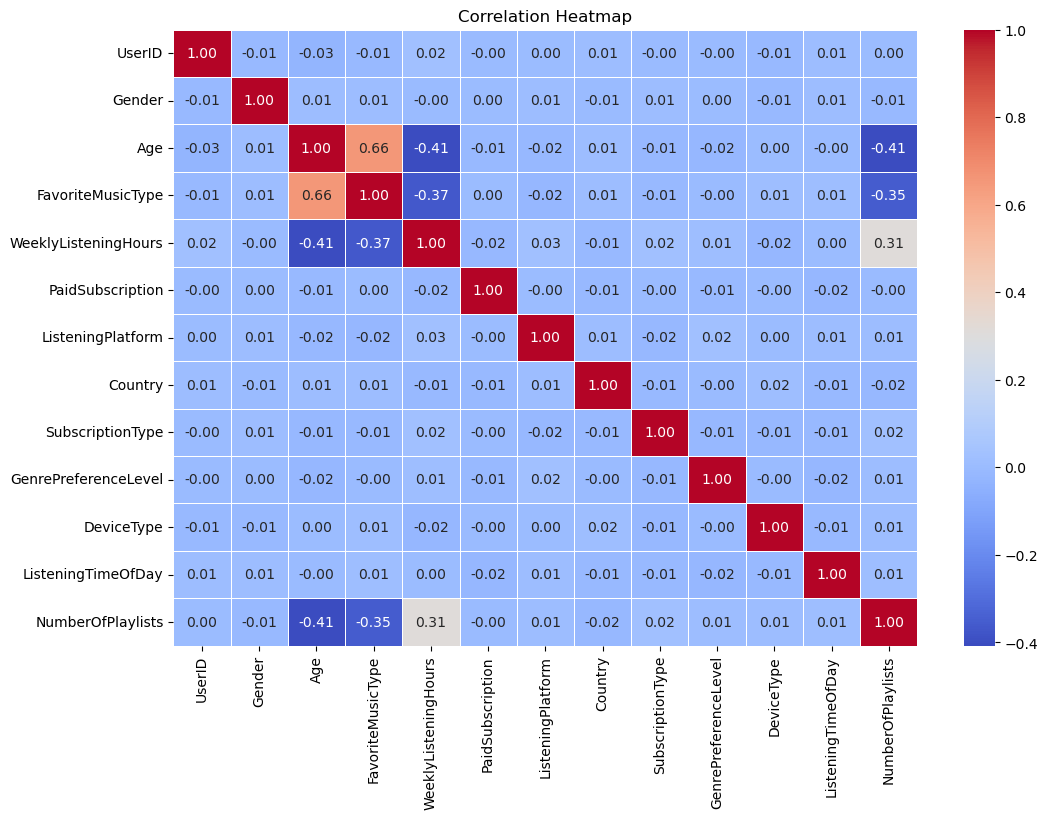

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## K-means

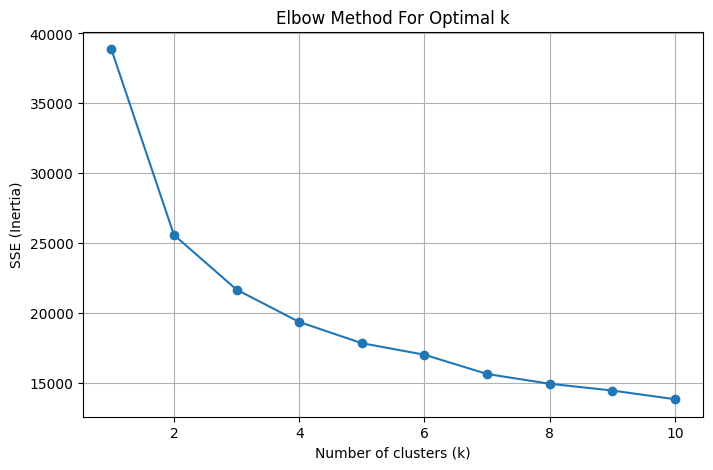

In [118]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# 数值和分类特征
num_features = ['Age', 'WeeklyListeningHours', 'NumberOfPlaylists']
cat_features = ['FavoriteMusicType']

# 创建预处理器：标准化 + One-Hot
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
])

# 拟合变换特征
X = preprocessor.fit_transform(df)

# 肘部法：计算不同k下的SSE
sse = []
K_range = range(1, 11) 

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# 绘图
plt.figure(figsize=(8, 5))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


In [75]:
# 假设 k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# 查看每个群体人数
print(df['Cluster'].value_counts())


Cluster
0    4576
1    3062
2    2362
Name: count, dtype: int64


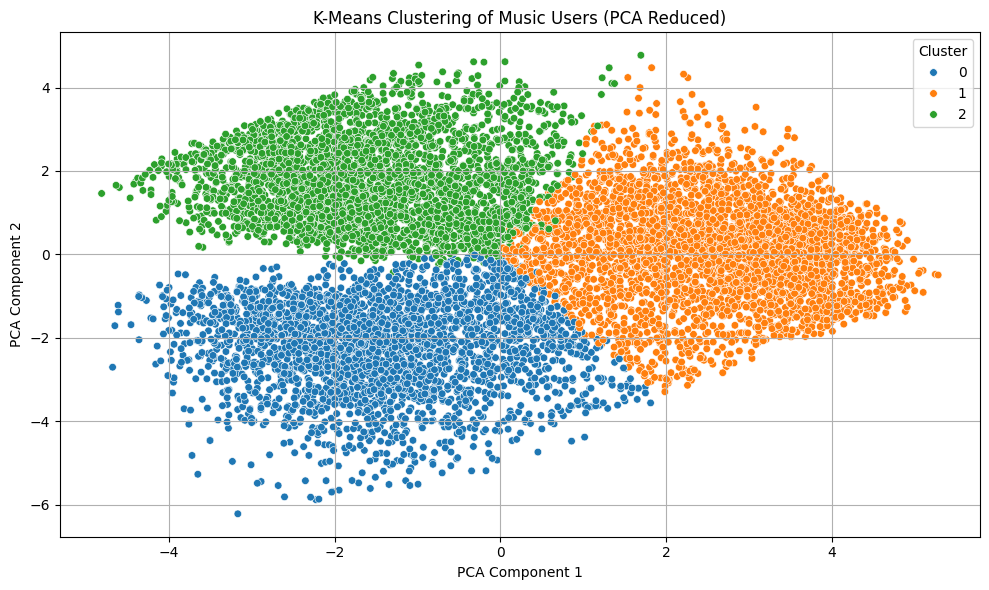

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# 2. Select features for clustering
num_features = ['Age', 'WeeklyListeningHours', 'NumberOfPlaylists']
cat_features = ['FavoriteMusicType']

# 4. Combine all features
features = pd.concat([df[num_features].reset_index(drop=True), df.reset_index(drop=True)], axis=1)

# 5. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 6. Apply KMeans clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 7. Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['pca1'] = components[:, 0]
df['pca2'] = components[:, 1]

# 8. Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='tab10', s=30)
plt.title('K-Means Clustering of Music Users (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


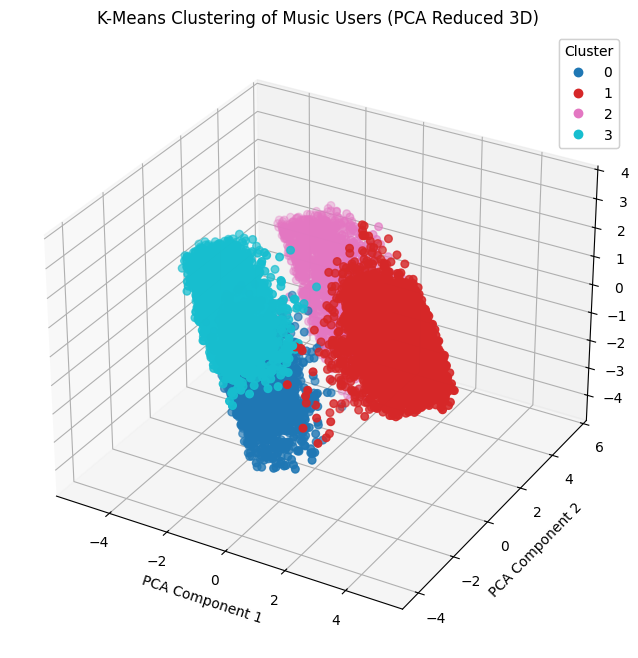

In [90]:
# Perform PCA with 3 components
pca_3d = PCA(n_components=3)
components_3d = pca_3d.fit_transform(X_scaled)
df['pca1'] = components_3d[:, 0]
df['pca2'] = components_3d[:, 1]
df['pca3'] = components_3d[:, 2]

# Plot the 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['pca1'], df['pca2'], df['pca3'], c=df['cluster'], cmap='tab10', s=30)
ax.set_title('K-Means Clustering of Music Users (PCA Reduced 3D)')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)
plt.show()

## MeanShift

## DBSCAN

In [55]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 10000
music_types = ['Rock', 'Pop', 'J-Pop', 'K-Pop', 'EDM', 'Jazz', 'Chill', 'Oldies', 'Traditional']

# 定义每种音乐类型的主年龄段、听歌时长、歌单数均值
music_type_params = {
    'Rock':         {'age_mu': 25, 'age_sigma': 6, 'hours_mu': 18, 'hours_sigma': 6, 'pl_mu': 40, 'pl_sigma': 20},
    'Pop':          {'age_mu': 23, 'age_sigma': 7, 'hours_mu': 20, 'hours_sigma': 7, 'pl_mu': 45, 'pl_sigma': 22},
    'J-Pop':        {'age_mu': 22, 'age_sigma': 5, 'hours_mu': 22, 'hours_sigma': 6, 'pl_mu': 50, 'pl_sigma': 18},
    'K-Pop':        {'age_mu': 21, 'age_sigma': 5, 'hours_mu': 23, 'hours_sigma': 7, 'pl_mu': 55, 'pl_sigma': 20},
    'EDM':          {'age_mu': 24, 'age_sigma': 6, 'hours_mu': 25, 'hours_sigma': 8, 'pl_mu': 60, 'pl_sigma': 25},
    'Jazz':         {'age_mu': 35, 'age_sigma': 8, 'hours_mu': 15, 'hours_sigma': 5, 'pl_mu': 30, 'pl_sigma': 15},
    'Chill':        {'age_mu': 32, 'age_sigma': 10, 'hours_mu': 17, 'hours_sigma': 6, 'pl_mu': 35, 'pl_sigma': 18},
    'Oldies':       {'age_mu': 40, 'age_sigma': 7, 'hours_mu': 13, 'hours_sigma': 5, 'pl_mu': 25, 'pl_sigma': 12},
    'Traditional':  {'age_mu': 42, 'age_sigma': 6, 'hours_mu': 12, 'hours_sigma': 4, 'pl_mu': 20, 'pl_sigma': 10},
}

# 随机分配音乐类型（可根据实际比例调整）
music_type_choices = np.random.choice(music_types, size=n, p=[0.13,0.13,0.10,0.10,0.10,0.10,0.12,0.12,0.10])

ages = []
hours = []
playlists = []

for mt in music_type_choices:
    p = music_type_params[mt]
    age = np.clip(np.random.normal(p['age_mu'], p['age_sigma']), 18, 45)
    hour = np.clip(np.random.normal(p['hours_mu'], p['hours_sigma']), 5, 30)
    pl = np.clip(np.random.normal(p['pl_mu'], p['pl_sigma']), 0, 100)
    ages.append(int(age))
    hours.append(int(hour))
    playlists.append(int(pl))

df = pd.DataFrame({
    'UserID': np.arange(1, n+1),
    'Gender': np.random.choice(['Male', 'Female'], n),
    'Age': ages,
    'FavoriteMusicType': music_type_choices,
    'WeeklyListeningHours': hours,
    'PaidSubscription': np.random.choice(['Yes', 'No'], n, p=[0.6, 0.4]),
    'ListeningPlatform': np.random.choice(['Spotify', 'Apple Music', 'QQ Music', 'NetEase Cloud', 'YouTube Music'], n),
    'Country': np.random.choice(['China', 'USA', 'Japan', 'Korea', 'UK', 'Germany', 'France', 'Brazil', 'India', 'Australia'], n),
    'SubscriptionType': np.random.choice(['Free', 'Premium', 'Family', 'Student'], n),
    'GenrePreferenceLevel': np.random.choice(['High', 'Medium', 'Low'], n),
    'DeviceType': np.random.choice(['Mobile', 'PC', 'Tablet', 'Smart Speaker'], n),
    'ListeningTimeOfDay': np.random.choice(['Morning', 'Afternoon', 'Evening', 'Night'], n),
    'NumberOfPlaylists': playlists
})

df.to_csv('music_users.csv', index=False)